In [1]:
import os 
path = 'D:\Data Science\Customer Clustering'
os.chdir(path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("data.csv",encoding = "ISO-8859-1")
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom


In [5]:
dataset.shape

(541909, 8)

In [21]:
#Removing missing values based on  CustomerID.
dataset.dropna(axis = 0, subset =['CustomerID'], inplace = True)
dataset.shape 
print (pd.DataFrame(dataset.isnull().sum()))

             0
InvoiceNo    0
StockCode    0
Description  0
Quantity     0
InvoiceDate  0
UnitPrice    0
CustomerID   0
Country      0


In [19]:
#Removing Cancelled orders
dataset = dataset[(dataset.InvoiceNo).apply(lambda x:( 'C' not in x))]
dataset.shape   
#Grouping customers based on their CustomerID
df_customerid_groups=dataset.groupby("CustomerID")
print (len((df_customerid_groups.groups))) 

4339


In [8]:
# Creating new DataFrame
df_cluster=pd.DataFrame(columns=['Quantity','UnitPrice','CustomerID'])
count=0
for k,v in (df_customerid_groups):
    df_cluster.loc[count] = [(v['Quantity'].sum()), v['UnitPrice'].sum(), k]
    count+=1
df_cluster.shape

(4339, 3)

In [20]:
print(df_cluster)

      Quantity  UnitPrice  CustomerID
0      74215.0       1.04     12346.0
1       2458.0     481.21     12347.0
2       2341.0     178.71     12348.0
3        631.0     605.10     12349.0
4        197.0      65.30     12350.0
5        536.0    1354.11     12352.0
6         20.0      24.30     12353.0
7        530.0     261.22     12354.0
8        240.0      54.65     12355.0
9       1591.0     188.87     12356.0
10      2708.0     438.67     12357.0
11       248.0     157.21     12358.0
12      1622.0    2137.86     12359.0
13      1165.0     457.91     12360.0
14        91.0      33.35     12361.0
15      2229.0    1048.29     12362.0
16       408.0      53.17     12363.0
17      1506.0     162.37     12364.0
18       174.0     377.31     12365.0
19       173.0      35.20     12367.0
20      2353.0     467.65     12370.0
21       591.0     244.08     12371.0
22       794.0     156.07     12372.0
23       197.0      64.15     12373.0
24       342.0     139.25     12374.0
25       178

In [9]:
#Applying K-Means Clustering Algorithm
#Using only 'Quantity','UnitPrice' columns to cluser 
X = df_cluster.iloc[:, [0, 1]].values

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

In [11]:
#Using the Elbow method to find the optical number of clusters
from sklearn.cluster import KMeans
wcss = [] #With in cluster sum of squers(Inertia)

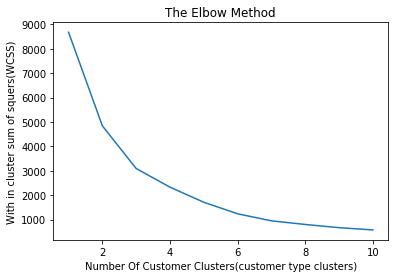

In [12]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('With in cluster sum of squers(WCSS)')
plt.show()

In [13]:
#From the plot we can see that at 3 distortion goes rapidly so n_clusters=3
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

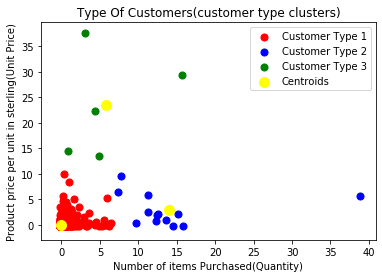

In [14]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer Type 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')
plt.legend()
plt.show()